# __SQL Exercise__ (Python Connector)
<hr>

#### - Create _connection_ Python with your SQL Database!
#### - Use ``Sakila`` database!
#### - If there isn't ``Sakila`` in your SQL Dataset, follow this guidance: https://dev.mysql.com/doc/sakila/en/sakila-installation.html & https://dev.mysql.com/doc/index-other.html


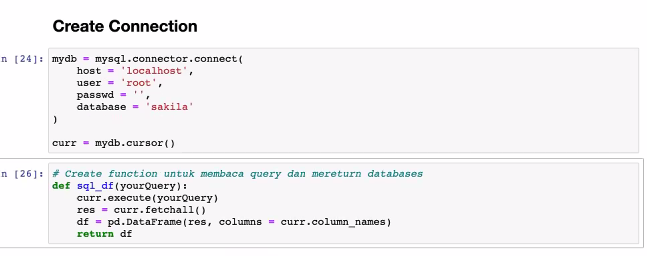

## Import Libraries

In [1]:
import mysql.connector
import pandas as pd
import numpy as np

## Create Connection

In [2]:
# set DB
myDB = {
    'user': 'damianus',
    'password': '12345',
    'host': 'localhost',
    'database': 'sakila'
}

In [3]:
# Define Client
connection = mysql.connector.connect(**myDB)
C = connection.cursor()

In [4]:
# Showing Databases
query = 'SHOW DATABASES'
C.execute(query)
for i in C:
    print(i)

('dbdamianus',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sales',)
('sys',)
('toko',)


In [5]:
query = "SHOW FULL TABLES"
C.execute(query)
data_tables = []
for i in C:
    data_tables.append(i)
data_tables

[('actor', 'BASE TABLE'),
 ('actor_info', 'VIEW'),
 ('address', 'BASE TABLE'),
 ('category', 'BASE TABLE'),
 ('city', 'BASE TABLE'),
 ('country', 'BASE TABLE'),
 ('customer', 'BASE TABLE'),
 ('customer_list', 'VIEW'),
 ('film', 'BASE TABLE'),
 ('film_actor', 'BASE TABLE'),
 ('film_category', 'BASE TABLE'),
 ('film_list', 'VIEW'),
 ('film_text', 'BASE TABLE'),
 ('inventory', 'BASE TABLE'),
 ('language', 'BASE TABLE'),
 ('nicer_but_slower_film_list', 'VIEW'),
 ('payment', 'BASE TABLE'),
 ('rental', 'BASE TABLE'),
 ('sales_by_film_category', 'VIEW'),
 ('sales_by_store', 'VIEW'),
 ('staff', 'BASE TABLE'),
 ('staff_list', 'VIEW'),
 ('store', 'BASE TABLE')]

## Manual Way to Get DataFrame

In [16]:
# Create function untuk membaca query dan mereturn databases
query = "SHOW FULL TABLES"
def get_data(query):
    C.execute(query)
    data_tables = []
    for i in C:
        data_tables.append(i)
        
    return data_tables

tables = get_data(query)
tables

[('actor', 'BASE TABLE'),
 ('actor_info', 'VIEW'),
 ('address', 'BASE TABLE'),
 ('category', 'BASE TABLE'),
 ('city', 'BASE TABLE'),
 ('country', 'BASE TABLE'),
 ('customer', 'BASE TABLE'),
 ('customer_list', 'VIEW'),
 ('film', 'BASE TABLE'),
 ('film_actor', 'BASE TABLE'),
 ('film_category', 'BASE TABLE'),
 ('film_list', 'VIEW'),
 ('film_text', 'BASE TABLE'),
 ('inventory', 'BASE TABLE'),
 ('language', 'BASE TABLE'),
 ('nicer_but_slower_film_list', 'VIEW'),
 ('payment', 'BASE TABLE'),
 ('rental', 'BASE TABLE'),
 ('sales_by_film_category', 'VIEW'),
 ('sales_by_store', 'VIEW'),
 ('staff', 'BASE TABLE'),
 ('staff_list', 'VIEW'),
 ('store', 'BASE TABLE')]

``Tampilkan seluruh tabel di Database Sakila (Full Table)``

In [24]:
df_tables = pd.DataFrame(tables, columns=("Tables_in_sakila", "Table_type"))
df_tables

,Tables_in_sakila,Table_type
0,actor,BASE TABLE
1,actor_info,VIEW
2,address,BASE TABLE
3,category,BASE TABLE
4,city,BASE TABLE
5,country,BASE TABLE
6,customer,BASE TABLE
7,customer_list,VIEW
8,film,BASE TABLE
9,film_actor,BASE TABLE


## Alt1: Function to Create DataFrame

In [6]:
# Set DB
myDB = {
    'user': 'damianus',
    'password': '12345',
    'host': 'localhost',
    'database': 'sakila'
}

# Define Client
connection = mysql.connector.connect(**myDB)
C = connection.cursor()

In [7]:
# Function to generate DataFrame
def return_sql_df(query):
    C.execute(query)
    result = C.fetchall()
    df = pd.DataFrame(result, columns=C.column_names)
    return df

## Alt 2: Function to Create DataFrame

In [23]:
# Set DB
myDB = {
    'user': 'damianus',
    'password': '12345',
    'host': 'localhost',
    'database': 'sakila'
}

# Define Client
connection = mysql.connector.connect(**myDB)
C = connection.cursor()

In [24]:
# Function to generate DataFrame
def return_sql_df_2(query_column, query_data):
    # extract column name
    C.execute(query_column)
    data_column = []
    for i in C:
        data_column.append(i)

    column_name = []
    for i in data_column:
        column_name.append(i[0])
    column_name = tuple(column_name)
    

    # extract data table
    C.execute(query_data)
    data_table = []
    for i in C:
        data_table.append(i)
    
    # creating dataframe
    df = pd.DataFrame(data_table, columns=column_name)
    
    return df

# Exercise
Show Rental Table

In [9]:
# extract data from rental table
query = "SELECT * FROM RENTAL"
rental_tables = return_sql_df(query)
len(rental_tables)

16044

In [37]:
# extract column name from rental tables
query = "DESCRIBE rental"
rental_tables_column_name = return_database(query)
rental_tables_column_name

column_name = []
for i in rental_tables_column_name:
#     print(i[0])
    column_name.append(i[0])

column_name = tuple(column_name)
column_name

('rental_id',
 'rental_date',
 'inventory_id',
 'customer_id',
 'return_date',
 'staff_id',
 'last_update')

In [38]:
# convert table to dataframe
df_rental_tables = pd.DataFrame(rental_tables, columns=column_name)
df_rental_tables.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


Show Customer Table

In [10]:
query = "SELECT * FROM customer limit 2"
return_sql_df(query)

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20


Show Address Table

In [11]:
query = "SELECT * FROM address limit 2"
return_sql_df(query)

,address_id,address,address2,district,city_id,postal_code,phone,location,last_update
0,1,47 MySakila Drive,None,Alberta,300,,,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 62, 10, 50, 93, 99...",2014-09-25 22:30:27
1,2,28 MySQL Boulevard,None,QLD,576,,,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 142, 16, 212, 223,...",2014-09-25 22:30:09


Show Country Table

In [12]:
query = "SELECT * FROM country limit 2"
return_sql_df(query)

,country_id,country,last_update
0,1,Afghanistan,2006-02-15 04:44:00
1,2,Algeria,2006-02-15 04:44:00


<hr>

## __Soal__

### 1. Tampilkan aktor yang memiliki nama depan ‘Scarlett’!


In [13]:
# using direct query
query = """SELECT first_name AS Nama_Depan, last_name AS Nama_Belakang FROM actor 
        WHERE first_name="Scarlett" 
        LIMIT 2"""
return_sql_df(query)

,Nama_Depan,Nama_Belakang
0,SCARLETT,DAMON
1,SCARLETT,BENING


In [83]:
# using df
query = "SELECT * FROM actor"
df_actor_table = return_sql_df(query)
data = df_actor_table[df_actor_table['first_name']=='SCARLETT'].iloc[:, 1:3]
data

,first_name,last_name
80,SCARLETT,DAMON
123,SCARLETT,BENING


### 2. Tampilkan aktor yang memiliki nama belakang ‘Johansson’!


In [93]:
query = """SELECT first_name AS Nama_Depan, last_name AS Nama_Belakang FROM actor
        WHERE last_name='johansson'
        """
return_sql_df(query)

,Nama_Depan,Nama_Belakang
0,MATTHEW,JOHANSSON
1,RAY,JOHANSSON
2,ALBERT,JOHANSSON


In [84]:
# using df
data = df_actor_table[df_actor_table['last_name']=='JOHANSSON'].iloc[:, 1:3]
data

,first_name,last_name
7,MATTHEW,JOHANSSON
63,RAY,JOHANSSON
145,ALBERT,JOHANSSON


### 3. Berapa banyak nama terakhir aktor (tanpa ada pengulangan/_distint_)?

In [14]:
query = """SELECT COUNT(DISTINCT last_name) AS Jumlah_Nama_Terakhir FROM actor
        """
return_sql_df(query)

,Jumlah_Nama_Terakhir
0,121


In [107]:
# using df
df_actor_table.last_name.nunique() # --? how to convert to dataframe

121

### 4. Tampilkan nama belakang aktor yang keluar hanya satu kali di database Sakila!¶

In [15]:
query = """SELECT last_name AS Nama_Belakang FROM actor
        GROUP BY last_name
        HAVING COUNT(*) = 1
        LIMIT 5
        """
return_sql_df(query)

,Nama_Belakang
0,ASTAIRE
1,BACALL
2,BALE
3,BALL
4,BARRYMORE


### 5. Tampilkan nama belakang aktor yang keluar lebih dari satu kali di database Sakila!


In [122]:
query = """SELECT last_name AS Nama_Belakang FROM actor
        GROUP BY last_name
        HAVING COUNT(*) > 1
        LIMIT 5
        """
return_sql_df(query)

,Nama_Belakang
0,AKROYD
1,ALLEN
2,BAILEY
3,BENING
4,BERRY


### 6. Tahun berapa film ‘Academy Dinosaur’ di-_release_?


In [16]:
query = """SELECT title AS Judul, release_year AS Tahun_Release FROM film
        WHERE title="ACADEMY DINOSAUR"
        """
return_sql_df(query)

,Judul,Tahun_Release
0,ACADEMY DINOSAUR,2006


In [53]:
# using df
df_film[df_film.title=="ACADEMY DINOSAUR"].iloc[:, [1,3]]

,title,release_year
0,ACADEMY DINOSAUR,2006


### 7. Berapa rata-rata durasi film di database Sakila?


In [17]:
query = """SELECT AVG(length) AS Rata_Durasi FROM film
        """
return_sql_df(query)

,Rata_Durasi
0,115.2720


In [54]:
df_film_list.length.mean()  # how to convert to df

115.14944834503511

### 8. Tampilkan rata-rata durasi film di tiap kategori film!  ????

In [19]:
query = """SELECT * FROM category"""
return_sql_df(query).head()

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


In [27]:
query = """SELECT * FROM film_category"""
return_sql_df(query).head()

,film_id,category_id,last_update
0,1,6,2006-02-15 05:07:09
1,2,11,2006-02-15 05:07:09
2,3,6,2006-02-15 05:07:09
3,4,11,2006-02-15 05:07:09
4,5,8,2006-02-15 05:07:09


In [24]:
query = """SELECT * FROM film"""
return_sql_df(query).head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Deleted Scenes, Behind the Scenes}",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Commentaries, Behind the Scenes}",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42


In [25]:
query = """SELECT category.name AS Category, AVG(film.length) AS Avg_Duration
        FROM ((film INNER JOIN film_list
        ON film.film_id = film_category.film_id)
        INNER JOIN category
        ON category.category_id = film_category.category_id)
        GROUP BY Category
        ORDER BY AVG(film.length) DESC"""
return_sql_df(query)

ProgrammingError: 1054 (42S22): Unknown column 'film_category.category_id' in 'on clause'

In [25]:
# Without Join
query = """SELECT category AS Category, AVG(length) AS Avg_Duration FROM film_list
        GROUP BY Category
        ORDER BY Avg_Duration DESC
        """
return_sql_df(query)

,Category,Avg_Duration
0,Games,127.8361
1,Sports,127.5068
2,Foreign,121.6986
3,Drama,119.8852
4,Comedy,115.8276
5,Family,114.7826
6,Music,113.6471
7,Travel,113.3750
8,Horror,112.4821
9,Classics,111.6667


In [63]:
# Solution
return_sql_df("""
SELECT category.name AS Category, avg(length) AS Avg_Duration
FROM film join film_category using (film_id) join category using (category_id)
GROUP BY category.name
ORDER BY avg(length) desc;
""")

,Category,Avg_Duration
0,Sports,128.2027
1,Games,127.8361
2,Foreign,121.6986
3,Drama,120.8387
4,Comedy,115.8276
5,Family,114.7826
6,Music,113.6471
7,Travel,113.3158
8,Horror,112.4821
9,Classics,111.6667


,Category,Avg_Duration
0,Sports,128.2027
1,Games,127.8361
2,Foreign,121.6986
3,Drama,120.8387
4,Comedy,115.8276
5,Family,114.7826
6,Music,113.6471
7,Travel,113.3158
8,Horror,112.4821
9,Classics,111.6667


### 9. Tampilkan kategori film yang memiliki rata-rata durasi (_average of length_) di atas rata-rata kategori film lainnya! ???

In [64]:
# with join
query = """SELECT * FROM category"""
return_sql_df(query).head(1)

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27


In [165]:
# without join
query = """SELECT category AS Category, AVG(length) AS Avg_Duration FROM film_list
        GROUP BY category
        ORDER BY Avg_Duration DESC
        LIMIT 5
        """
return_sql_df(query)

,Category,Avg_Duration
0,Games,127.8361
1,Sports,127.5068
2,Foreign,121.6986
3,Drama,119.8852
4,Comedy,115.8276


In [27]:
# Solution
return_sql_df("""
SELECT category.name as Category, avg(length) as Avg_Duration
from film join film_category using (film_id) join category using (category_id)
group by category.name
having Avg_Duration > (select avg(length) from film)
order by avg(length) desc;
""")

,Category,Avg_Duration
0,Sports,128.2027
1,Games,127.8361
2,Foreign,121.6986
3,Drama,120.8387
4,Comedy,115.8276


,Category,Avg_Duration
0,Sports,128.2027
1,Games,127.8361
2,Foreign,121.6986
3,Drama,120.8387
4,Comedy,115.8276


### 10. Berapa banyak customer yang dilayani oleh 2 staff di Sakila Database

In [28]:
query = "SELECT * FROM staff_list"
df_film = return_sql_df(query)
df_film

,ID,name,address,zip code,phone,city,country,SID
0,1,Mike Hillyer,23 Workhaven Lane,,14033335568,Lethbridge,Canada,1
1,2,Jon Stephens,1411 Lillydale Drive,,6172235589,Woodridge,Australia,2


In [29]:
# data staff_list
query = "SELECT * FROM staff_list"
df_film = return_sql_df(query)
df_film

,ID,name,address,zip code,phone,city,country,SID
0,1,Mike Hillyer,23 Workhaven Lane,,14033335568,Lethbridge,Canada,1
1,2,Jon Stephens,1411 Lillydale Drive,,6172235589,Woodridge,Australia,2


In [30]:
# data rental
query = """SELECT * FROM rental"""
return_sql_df(query).head()
# df = return_sql_df(query)
# len(df)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [31]:
# with join
query = """SELECT staff_list.name AS Staff, COUNT(rental.customer_id) AS Total_Customer
        FROM staff_list INNER JOIN rental
        ON staff_list.ID = rental.staff_id
        GROUP BY Staff"""
return_sql_df(query).head()

,Staff,Total_Customer
0,Mike Hillyer,8040
1,Jon Stephens,8004


### 11. Tampilkan _total order_ (jumlah penyewaan) setiap kategori film! ????

In [50]:
query = "SELECT * FROM rental"
df = return_sql_df(query)
df.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [61]:
query = "SELECT * FROM film_category"
df = return_sql_df(query)
df.head()

,film_id,category_id,last_update
0,1,6,2006-02-15 05:07:09
1,2,11,2006-02-15 05:07:09
2,3,6,2006-02-15 05:07:09
3,4,11,2006-02-15 05:07:09
4,5,8,2006-02-15 05:07:09


In [ ]:
query = """SELECT sales_by_film_category.category AS Category, COUNT(rental.customer_id) AS Total_Order
        FROM sales_by_film_category INNER JOIN rental
        ON sales_by_film_category INNER JOIN rental"""
df = return_sql_df(query)
df.head()

In [62]:
# solution
return_sql_df("""
SELECT category.name AS Category, 
count(rental.rental_id) AS Total_Order
FROM rental join inventory using (inventory_id) 
join film_category using (film_id) 
join category using (category_id)
GROUP BY category.name
ORDER BY Total_Order desc;
""")

,Category,Total_Order
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096
5,Drama,1060
6,Documentary,1050
7,Foreign,1033
8,Games,969
9,Children,945


In [16]:
# ?????

,Category,Total_Order
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096
5,Drama,1060
6,Documentary,1050
7,Foreign,1033
8,Games,969
9,Children,945


### 12. Tampilkan 5 kota dengan total order (jumlah penyewaan) terbesar!

In [42]:
query = "SELECT * FROM city"
df_city = return_sql_df(query)
df_city.head(1)
# len(df_city)

,city_id,city,country_id,last_update
0,1,A Corua (La Corua),87,2006-02-15 04:45:25


In [45]:
query = "SELECT * FROM rental"
df = return_sql_df(query)
df.head(1)
# len(df)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53


In [46]:
query = "SELECT * FROM address"
df = return_sql_df(query)
df.head(1)
# len(df)

,address_id,address,address2,district,city_id,postal_code,phone,location,last_update
0,1,47 MySakila Drive,None,Alberta,300,,,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 62, 10, 50, 93, 99...",2014-09-25 22:30:27


In [47]:
query = "SELECT * FROM customer"
df = return_sql_df(query)
df.head(1)
# len(df)

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [57]:
query = """SELECT city.city AS Nama_Kota, COUNT(rental.rental_id) AS Total_Order 
        
        FROM rental 
        INNER JOIN customer USING (customer_id)
        INNER JOIN address USING (address_id)
        INNER JOIN city USING (city_id)
   
        GROUP BY Nama_Kota
        ORDER BY Total_Order DESC
        LIMIT 5
        
        """

#         FROM rental 
#         JOIN customer USING (customer_id) 
#         JOIN address USING (address_id) 
#         JOIN city USING (city_id)
df_city = return_sql_df(query)
df_city

,Nama_Kota,Total_Order
0,Aurora,50
1,London,48
2,Saint-Denis,46
3,Cape Coral,45
4,Molodetno,42


,Nama_Kota,Total_Order
0,Aurora,50
1,London,48
2,Saint-Denis,46
3,Cape Coral,45
4,Molodetno,42


# Sakila

query = """SELECT * FROM film_list
        
        """
df = return_df(query)
df.head(5)

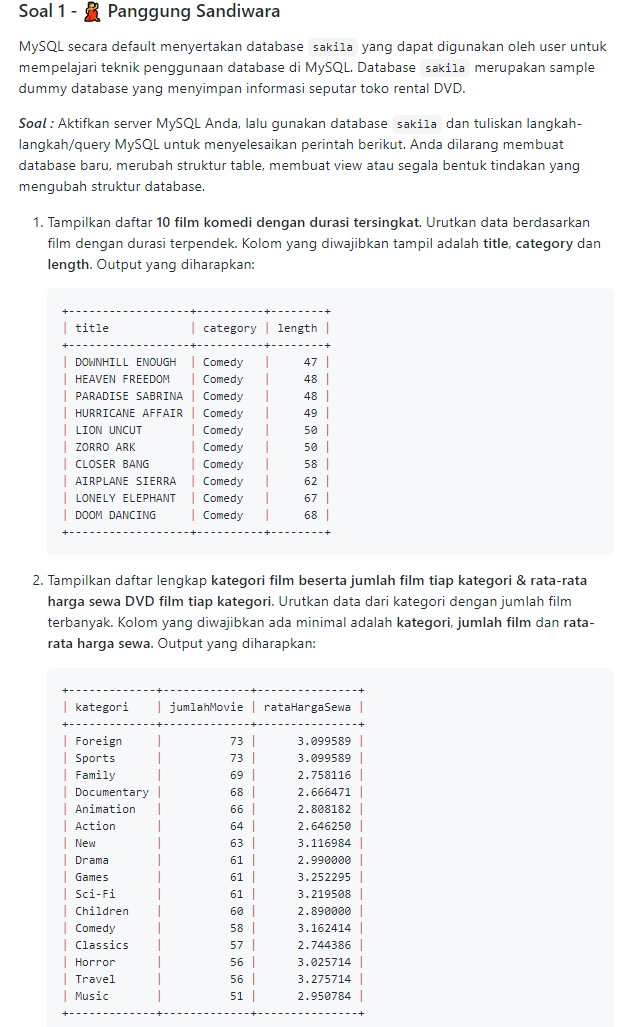

In [1]:
# Import Libraries
import mysql.connector
import pandas as pd
import numpy as np

# Set DB
myDB = {
    'user': 'damianus',
    'password': '12345',
    'host': 'localhost',
    'database': 'sakila'
}

# Define Client
connection = mysql.connector.connect(**myDB)
C = connection.cursor()

# Function to generate DataFrame
def return_df(query):
    C.execute(query)
    result = C.fetchall()
    df = pd.DataFrame(result, columns=C.column_names)
    return df

### 1) 10 Film komedi dengan durasi tersingkat

In [2]:
query = """SELECT title, category, length FROM film_list
        WHERE category='Comedy'
        ORDER BY length
        """
return_df(query).head(10)

,title,category,length
0,DOWNHILL ENOUGH,Comedy,47
1,HEAVEN FREEDOM,Comedy,48
2,PARADISE SABRINA,Comedy,48
3,HURRICANE AFFAIR,Comedy,49
4,ZORRO ARK,Comedy,50
5,LION UNCUT,Comedy,50
6,CLOSER BANG,Comedy,58
7,AIRPLANE SIERRA,Comedy,62
8,LONELY ELEPHANT,Comedy,67
9,DOOM DANCING,Comedy,68


### 2) Kategori film beserta jumlah film tiap kategori & rata-rata harga sewa DVD film tiap kategori

In [3]:
query = """SELECT category AS kategori, COUNT(category) AS jumlahMovie, AVG(price) AS rataHargaSewa FROM film_list
        GROUP BY kategori
        ORDER BY jumlahMovie DESC
        """
df = return_df(query)
df

,kategori,jumlahMovie,rataHargaSewa
0,Foreign,73,3.099589
1,Sports,73,3.099589
2,Family,69,2.758116
3,Documentary,68,2.666471
4,Animation,66,2.808182
5,Action,64,2.646250
6,New,63,3.116984
7,Sci-Fi,61,3.219508
8,Drama,61,2.990000
9,Games,61,3.252295


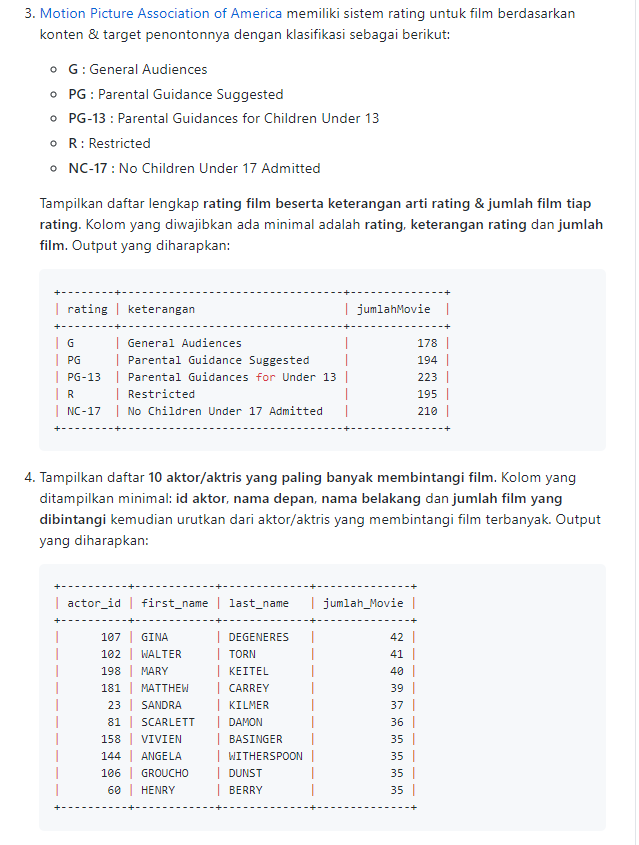

### 3) Rating film beserta keterangan arti rating & jumlah film tiap rating.

In [4]:
query = """SELECT rating, COUNT(rating) AS jumlahMovie FROM film
        GROUP BY rating
        ORDER BY rating
        """
df = return_df(query)
df['keterangan'] = ["General Audiences", "Parental Guidance Suggested", "Parental Guidances for Children Under 13", "Restricted", "No Children Under 17 Admitted"]
df_rating = df.loc[:, ['rating', 'keterangan', 'jumlahMovie']]
df_rating

,rating,keterangan,jumlahMovie
0,G,General Audiences,178
1,PG,Parental Guidance Suggested,194
2,PG-13,Parental Guidances for Children Under 13,223
3,R,Restricted,195
4,NC-17,No Children Under 17 Admitted,210


### 4) 10 aktor/aktris yang paling banyak membintangi film

In [5]:
query = """SELECT actor_info.actor_id, actor_info.first_name, actor_info.last_name, COUNT(film_actor.film_id) AS jumlah_Movie 
        FROM actor_info INNER JOIN film_actor
        ON actor_info.actor_id = film_actor.actor_id
        
        GROUP BY actor_id
        ORDER BY jumlah_Movie DESC
        LIMIT 20
        """
df = return_df(query)
df

,actor_id,first_name,last_name,jumlah_Movie
0,107,GINA,DEGENERES,42
1,102,WALTER,TORN,41
2,198,MARY,KEITEL,40
3,181,MATTHEW,CARREY,39
4,23,SANDRA,KILMER,37
5,81,SCARLETT,DAMON,36
6,37,VAL,BOLGER,35
7,106,GROUCHO,DUNST,35
8,13,UMA,WOOD,35
9,158,VIVIEN,BASINGER,35


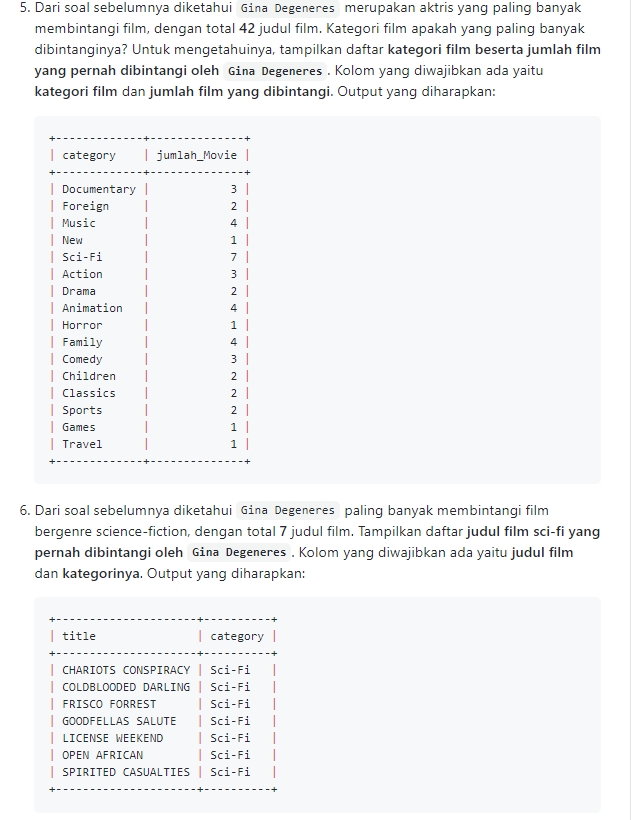

### 5) Kategori film beserta jumlah film yang pernah dibintangi oleh Gina Degeneres

In [6]:
# ALT 1
query = """SELECT film_list.category, COUNT(film_actor.film_id) AS jumlah_Movie 
    FROM film_list INNER JOIN film_actor
    ON film_list.FID = film_actor.film_id
    
    WHERE actor_id = 107
    
    GROUP BY film_list.category
    
    """
df = return_df(query) 
df

,category,jumlah_Movie
0,Documentary,3
1,Foreign,2
2,Music,4
3,New,1
4,Sci-Fi,7
5,Action,3
6,Drama,2
7,Animation,4
8,Horror,1
9,Family,4


In [7]:
# ALT 2
query = """SELECT film_list.category, COUNT(film_actor.actor_id) AS jumlah_Movie
    FROM film_actor INNER JOIN film_list
    ON film_actor.film_id = film_list.FID
    
    WHERE actor_id=107
    
    GROUP BY category
    """
df = return_df(query) 
df


# query = """SELECT film_list.category, film_actor.actor_id  
#     FROM film_actor INNER JOIN film_list
#     ON film_actor.film_id = film_list.FID
#     """
# df = return_df(query) 
# df
# df_gina = df[df.actor_id==107]
# df_gina

,category,jumlah_Movie
0,Documentary,3
1,Foreign,2
2,Music,4
3,New,1
4,Sci-Fi,7
5,Action,3
6,Drama,2
7,Animation,4
8,Horror,1
9,Family,4


### 6) Judul film sci-fi yang pernah dibintangi oleh Gina Degeneres

In [8]:
query = """SELECT film_list.title, film_list.category
    FROM film_actor INNER JOIN film_list
    ON film_actor.film_id = film_list.FID
    
    WHERE actor_id=107 AND category='Sci-Fi'  
    
    GROUP BY title
    """
df = return_df(query) 
df

,title,category
0,CHARIOTS CONSPIRACY,Sci-Fi
1,COLDBLOODED DARLING,Sci-Fi
2,FRISCO FORREST,Sci-Fi
3,GOODFELLAS SALUTE,Sci-Fi
4,LICENSE WEEKEND,Sci-Fi
5,OPEN AFRICAN,Sci-Fi
6,SPIRITED CASUALTIES,Sci-Fi


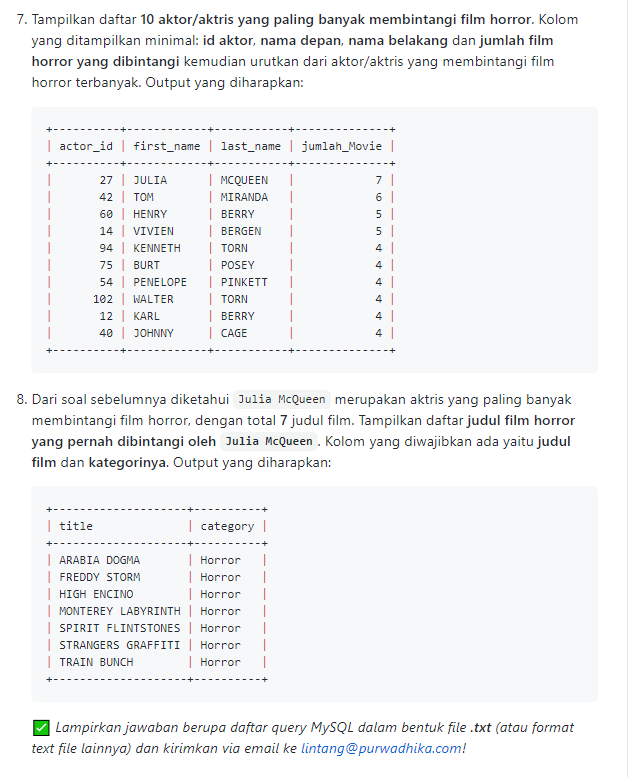

### 7)  10 aktor/aktris yang paling banyak membintangi film horror

In [9]:
# Join 4 tables, seach the chain key, place the main key in the first order
query = """SELECT actor_info.actor_id, actor_info.first_name, actor_info.last_name, COUNT(film_category.category_id) AS jumlah_Movie
    FROM actor_info
    JOIN film_actor USING (actor_id)
    JOIN film_category USING (film_id)
    JOIN category USING (category_id)
    
    WHERE category_id=11
    
    GROUP BY actor_id
    ORDER BY jumlah_Movie DESC
    LIMIT 10
    """
df = return_df(query) 
df

,actor_id,first_name,last_name,jumlah_Movie
0,27,JULIA,MCQUEEN,7
1,42,TOM,MIRANDA,6
2,60,HENRY,BERRY,5
3,14,VIVIEN,BERGEN,5
4,26,RIP,CRAWFORD,4
5,94,KENNETH,TORN,4
6,179,ED,GUINESS,4
7,157,GRETA,MALDEN,4
8,40,JOHNNY,CAGE,4
9,75,BURT,POSEY,4


##### sequence to order the key

In [10]:
query = """SELECT * FROM actor_info
    """
df = return_df(query) 
df.head(1)

,actor_id,first_name,last_name,film_info
0,1,PENELOPE,GUINESS,Animation: ANACONDA CONFESSIONS; Children: LAN...


In [11]:
# actor_id to actor_id
query = """SELECT * FROM film_actor
    """
df = return_df(query) 
df.head(1)

,actor_id,film_id,last_update
0,1,1,2006-02-15 05:05:03


In [12]:
# film_id to film_id
query = """SELECT * FROM film_category
    """
df = return_df(query) 
df.head(1)

,film_id,category_id,last_update
0,1,6,2006-02-15 05:07:09


In [13]:
# category_id to category_id
query = """SELECT * FROM category
    """
df = return_df(query) 
df

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27
5,6,Documentary,2006-02-15 04:46:27
6,7,Drama,2006-02-15 04:46:27
7,8,Family,2006-02-15 04:46:27
8,9,Foreign,2006-02-15 04:46:27
9,10,Games,2006-02-15 04:46:27


### 8) Judul film horror yang pernah dibintangi oleh Julia McQueen

In [14]:
query = """SELECT film_list.title, film_list.category
    FROM film_actor INNER JOIN film_list
    ON film_actor.film_id = film_list.FID
    
    WHERE actor_id=27 AND category='Horror'  
    
    GROUP BY title
    """
df = return_df(query) 
df

,title,category
0,ARABIA DOGMA,Horror
1,FREDDY STORM,Horror
2,HIGH ENCINO,Horror
3,MONTEREY LABYRINTH,Horror
4,SPIRIT FLINTSTONES,Horror
5,STRANGERS GRAFFITI,Horror
6,TRAIN BUNCH,Horror


##### sequence to order the key

In [15]:
query = """SELECT * FROM film_actor
    """
df = return_df(query) 
df.head(1)

,actor_id,film_id,last_update
0,1,1,2006-02-15 05:05:03


In [16]:
# film_id to FID
query = """SELECT * FROM film_list
    """
df = return_df(query) 
df.head(1)

,FID,title,description,category,price,length,rating,actors
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,Documentary,0.99,86,PG,"WARREN NOLTE, OPRAH KILMER, ROCK DUKAKIS, MENA..."
